<a href="https://colab.research.google.com/github/analuzna/Mentor-a-M17-Estimaci-n-de-biomasa-en-Inventarios-Forestales-Nacionales/blob/main/Mentoria_M17_Grupo_1_TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Notebook N1 Mentoría 17

M17 - Inventarios Forestales Nacionales, calculo de biomasa y evaluación del estado de los bosques nativos.

### TP1 >> Análisis y Visualizacion de los datasets
- Grupo 1
- Integrantes:
    - Guillermo Poggioni
    - Ana Luz Alabi Nassr
    - Nicolas Balmaceda

In [21]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Archivo 1 >> Tabla_general_2021

In [22]:
url = 'https://raw.githubusercontent.com/poggiogu/DiploDatos2025_Mentoria_17/master/2INBN_Tabla_general_2021.csv'
df_general = pd.read_csv(url, encoding='latin1')

In [23]:
df_general.head(3)

,UM_ID_UM,REGION_OFC,SUBREG,PROVINCIA,MEDIA_ALTURA_UM_EST,SUMA_DAP_X_UM,AREA_BASAL_UM_HA,VOL_M3_HA,CANTIDAD_IND_VIVOS_UM,CANTIDAD_IND_VIVOS_HA,...,FORMAS_CACTACEAS,FORMAS_EPIFITAS,FORMAS_BRIOFITAS,FORMAS_LIANAS,FORMAS_ORQUIDEAS,FORMAS_GRAMINEAS,FORMAS_OTRAS,Ley_N1_06,Ley_N2_06,PRESENTA_IND_INVENTARIABLE
0,6074195,MON,Monte,6.0,3.471429,0.914532,1.560872,1.728589,14.0,257.2,...,False,False,False,False,False,True,False,OTF,Bosque mixto,SI
1,6075190,ESP,Distrito del Caldén,6.0,5.450000,0.665793,2.928567,13.001816,2.0,49.3,...,False,False,False,False,False,True,False,TF,Bosques de caldén abierto con arbustos,SI
2,6076186,ESP,Distrito del Caldén,6.0,3.897143,4.097999,6.866252,44.521998,35.0,877.4,...,True,True,False,False,False,True,False,TF,Bosques de caldén abierto con arbustos,SI


In [24]:
print(f'Shape del dataframe df_general: {df_general.shape}')
print("")
df_general.info()

Shape del dataframe df_general: (3891, 62)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3891 entries, 0 to 3890
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   UM_ID_UM                    3891 non-null   int64  
 1   REGION_OFC                  3890 non-null   object 
 2   SUBREG                      3814 non-null   object 
 3   PROVINCIA                   3890 non-null   float64
 4   MEDIA_ALTURA_UM_EST         3815 non-null   float64
 5   SUMA_DAP_X_UM               3815 non-null   float64
 6   AREA_BASAL_UM_HA            3815 non-null   float64
 7   VOL_M3_HA                   3795 non-null   float64
 8   CANTIDAD_IND_VIVOS_UM       3815 non-null   float64
 9   CANTIDAD_IND_VIVOS_HA       3815 non-null   float64
 10  PORCENTAJE_COB_3            3810 non-null   float64
 11  PORCENTAJE_COB_7            3808 non-null   float64
 12  PORCENTAJE_COB_TOTAL        3811 non-null   fl

In [25]:
columnas_num = df_general.select_dtypes(include=['number']).columns.tolist()
columnas_cat = df_general.select_dtypes(exclude=['number']).columns.tolist()

print("Columnas numéricas:", columnas_num)
print("Columnas categóricas:", columnas_cat)

Columnas numéricas: ['UM_ID_UM', 'PROVINCIA', 'MEDIA_ALTURA_UM_EST', 'SUMA_DAP_X_UM', 'AREA_BASAL_UM_HA', 'VOL_M3_HA', 'CANTIDAD_IND_VIVOS_UM', 'CANTIDAD_IND_VIVOS_HA', 'PORCENTAJE_COB_3', 'PORCENTAJE_COB_7', 'PORCENTAJE_COB_TOTAL', 'PORCENTAJE_COB_ARBUSTIVA', 'PORCENTAJE_COB_INFERIOR', 'MEDIA_ALT_TOCONES', 'MEDIA_DAB_TOCONES', 'CANTIDAD_TOCONES_X_UM', 'CANTIDAD_TOCONES_X_HA', 'REGENERACION_UM', 'REGENERACION_HA', 'LONGITUD_GRILLA', 'LATITUD_GRILLA', 'LONGITUD_INSTALACION', 'LATITUD_INSTALACION', 'ALTITUD', 'FECHA_UM_ANIO', 'FECHA_UM_MES']
Columnas categóricas: ['REGION_OFC', 'SUBREG', 'PENDIENTE_CATEGORIA', 'EXPOSICION', 'OTBN_CATEGORIA', 'TIPO_PAISAJE', 'SALINIDAD_PRESENCIA', 'INCENDIOS_RASTROS', 'PASTOREO_PRESENCIA', 'GANADO_BOVINO', 'GANADO_OVINO', 'GANADO_CAPRINO', 'GANADO_EQUINO', 'GANADO_OTRO', 'GANADO_OTRO_TIPO', 'EROSION_PRESENCIA', 'EROSION_FISICA_PRESENCIA', 'EROSION_EOLICA_PRESENCIA', 'EROSION_HIDRICA_PRESENCIA', 'PFNM_PRESENCIA_RESUMEN', 'PFNM_REGISTRO_1', 'PFNM_REGISTRO_2

#### Se ven que hay variables que contienen valores numéricos pero son de naturaleza categórica
estos son: **FECHA_UM_MES**, **FECHA_UM_ANIO**, **PROVINCIA**

In [26]:
columnas_codificadas = ['FECHA_UM_MES','FECHA_UM_ANIO','PROVINCIA']
columnas_num = [col for col in columnas_num if col not in columnas_codificadas]

print('Columnas CATEGÓRICAS:', columnas_cat)
print('Columnas NUMÉRICAS:', columnas_num)
print('Columnas CODIFICADAS:', columnas_codificadas)

Columnas CATEGÓRICAS: ['REGION_OFC', 'SUBREG', 'PENDIENTE_CATEGORIA', 'EXPOSICION', 'OTBN_CATEGORIA', 'TIPO_PAISAJE', 'SALINIDAD_PRESENCIA', 'INCENDIOS_RASTROS', 'PASTOREO_PRESENCIA', 'GANADO_BOVINO', 'GANADO_OVINO', 'GANADO_CAPRINO', 'GANADO_EQUINO', 'GANADO_OTRO', 'GANADO_OTRO_TIPO', 'EROSION_PRESENCIA', 'EROSION_FISICA_PRESENCIA', 'EROSION_EOLICA_PRESENCIA', 'EROSION_HIDRICA_PRESENCIA', 'PFNM_PRESENCIA_RESUMEN', 'PFNM_REGISTRO_1', 'PFNM_REGISTRO_2', 'PFNM_REGISTRO_3', 'PFNM_REGISTRO_4', 'PFNM_REGISTRO_5', 'FORMAS_HELECHOS', 'FORMAS_CACTACEAS', 'FORMAS_EPIFITAS', 'FORMAS_BRIOFITAS', 'FORMAS_LIANAS', 'FORMAS_ORQUIDEAS', 'FORMAS_GRAMINEAS', 'FORMAS_OTRAS', 'Ley_N1_06', 'Ley_N2_06', 'PRESENTA_IND_INVENTARIABLE']
Columnas NUMÉRICAS: ['UM_ID_UM', 'MEDIA_ALTURA_UM_EST', 'SUMA_DAP_X_UM', 'AREA_BASAL_UM_HA', 'VOL_M3_HA', 'CANTIDAD_IND_VIVOS_UM', 'CANTIDAD_IND_VIVOS_HA', 'PORCENTAJE_COB_3', 'PORCENTAJE_COB_7', 'PORCENTAJE_COB_TOTAL', 'PORCENTAJE_COB_ARBUSTIVA', 'PORCENTAJE_COB_INFERIOR', 'MED

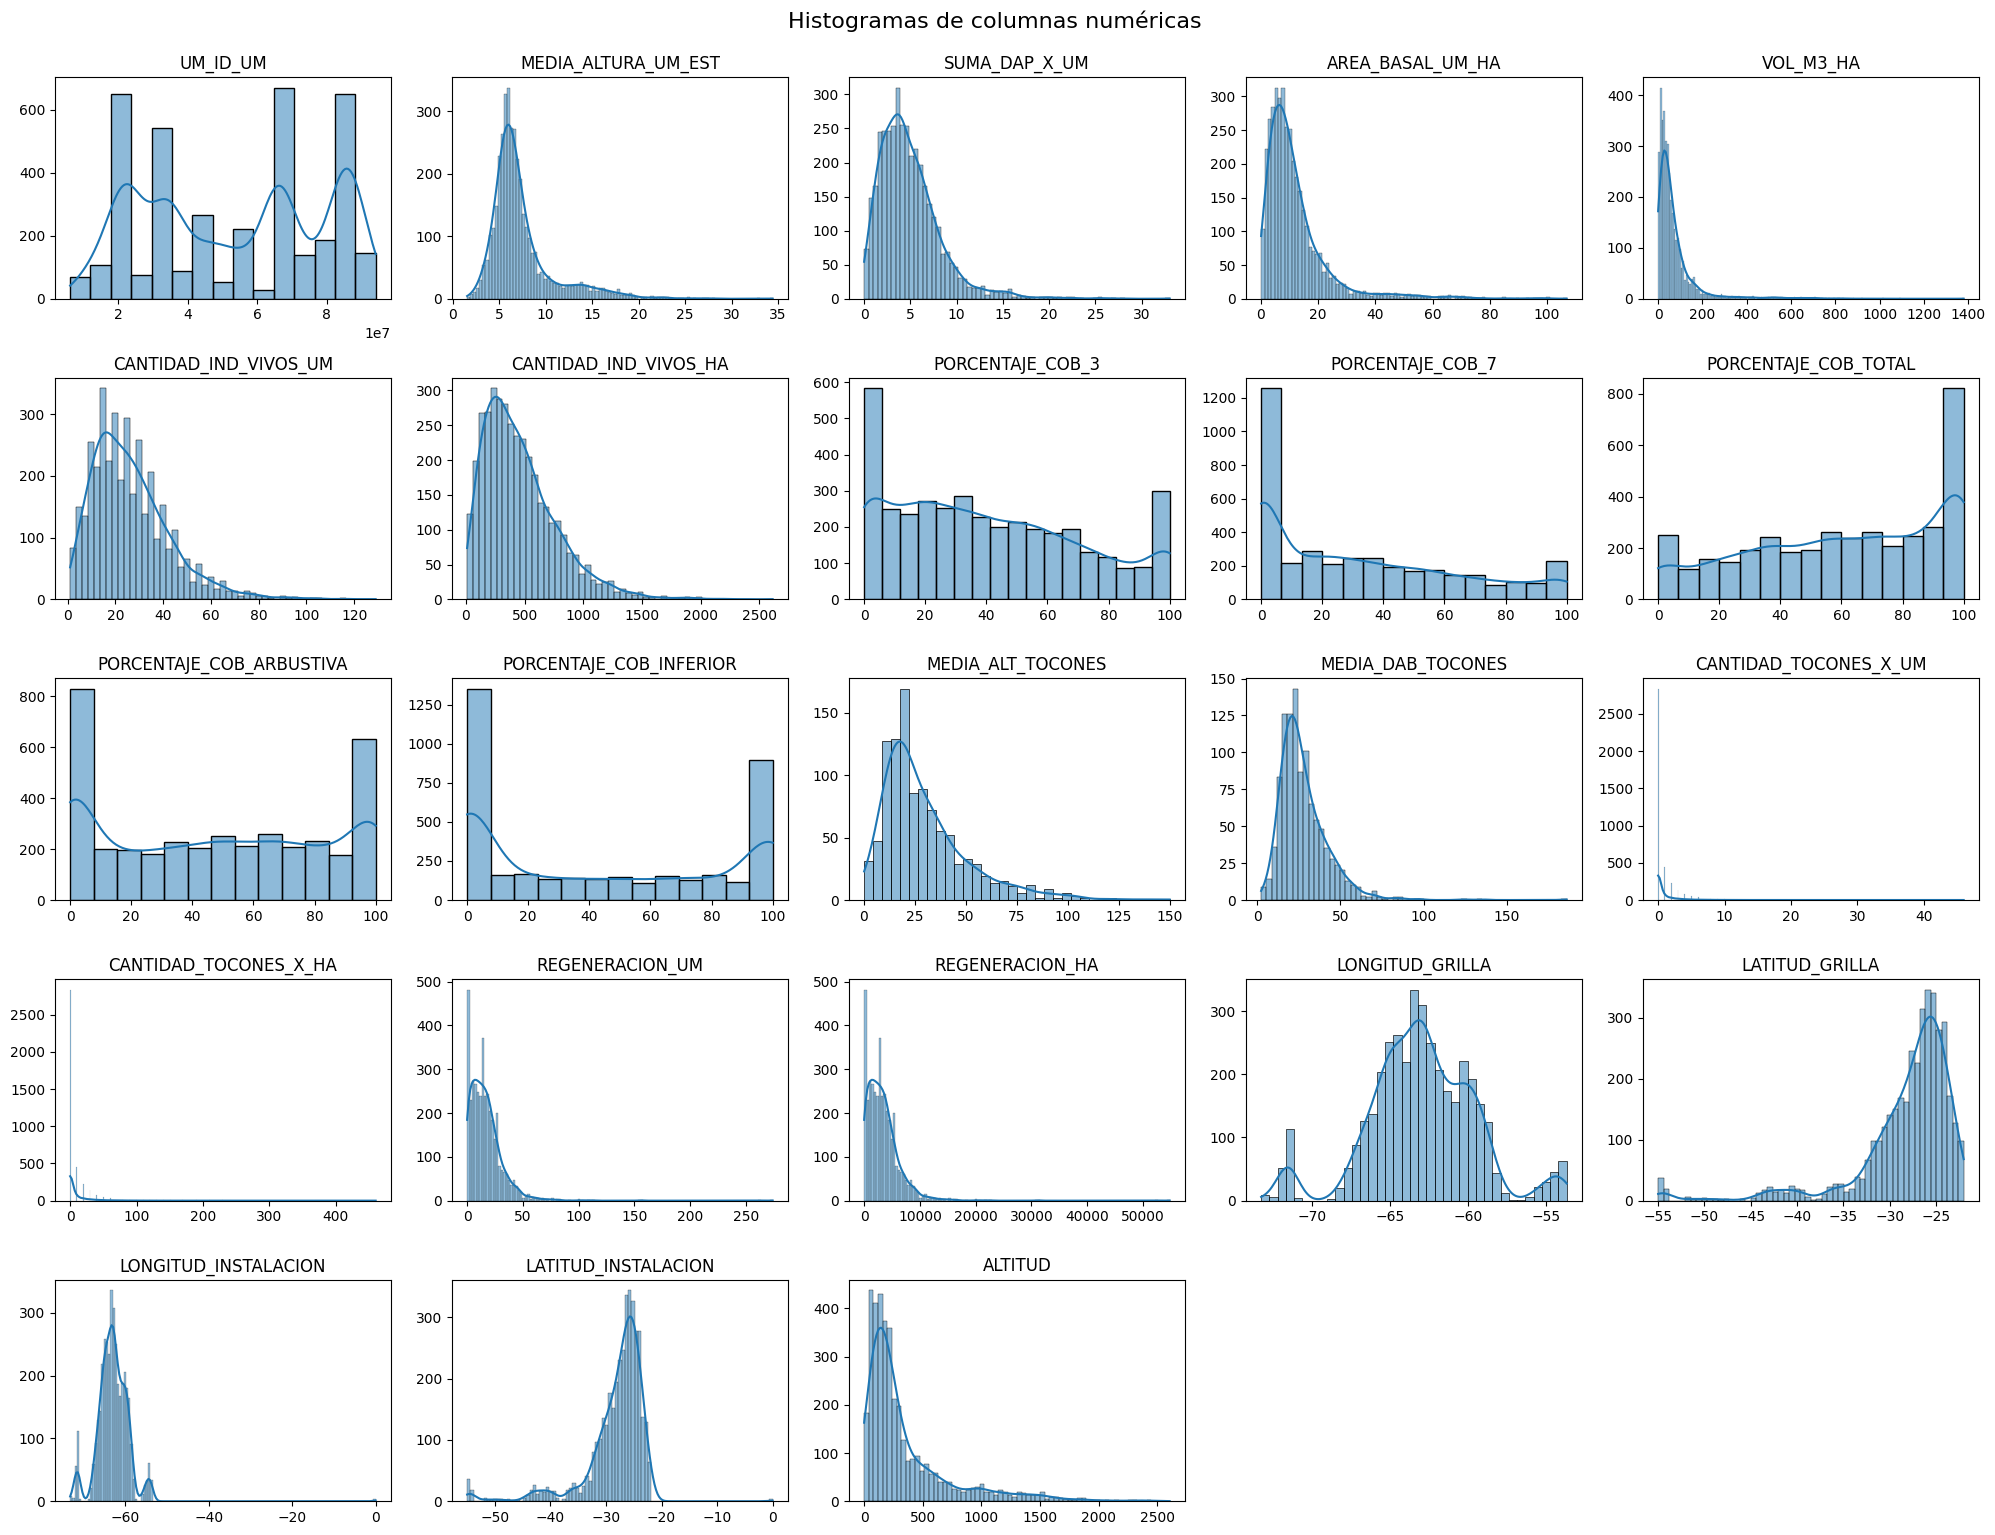

In [27]:
import math
# Número de columnas a graficar
n = len(columnas_num)

# Determinar cantidad de filas y columnas
n_cols = 5
n_rows = math.ceil(n / n_cols)

# Crear figura y ejes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*3))
axes = axes.flatten()  # Para iterar fácilmente

# Graficar cada histograma
for i, col in enumerate(columnas_num):
    sns.histplot(df_general[col], kde=True, ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Borrar subplots vacíos si hay
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Histogramas de columnas numéricas", fontsize=16, y=1.02)
plt.show()

### Drop de outliers y nuevo gráfico:
eliminamos los datos extremos para las variables numéricas, dejando solo los datos entre los cuantiles 1 y 99.

Nos terminan quedando 874 datos en la tabla. Eliminamos un 20% de datos.

In [28]:
# Eliminamos outliers por percentiles en las columnas numéricas
df_general_filtrado = df_general.copy()
for col in columnas_num:
    lower = df_general[col].quantile(0.01) # el 99% de los datos de la columna son MAYORES a este valor
    upper = df_general[col].quantile(0.99) # el 99% de los datos de la columna son MENORES a este valor
    df_general_filtrado = df_general_filtrado[(df_general_filtrado[col] >= lower) & (df_general_filtrado[col] <= upper)]
print(f'Shape antes de eliminar outliers:{df_general.shape}')
print(f"Shape después de eliminar outliers: {df_general_filtrado.shape}")

Shape antes de eliminar outliers:(3891, 62)
Shape después de eliminar outliers: (874, 62)


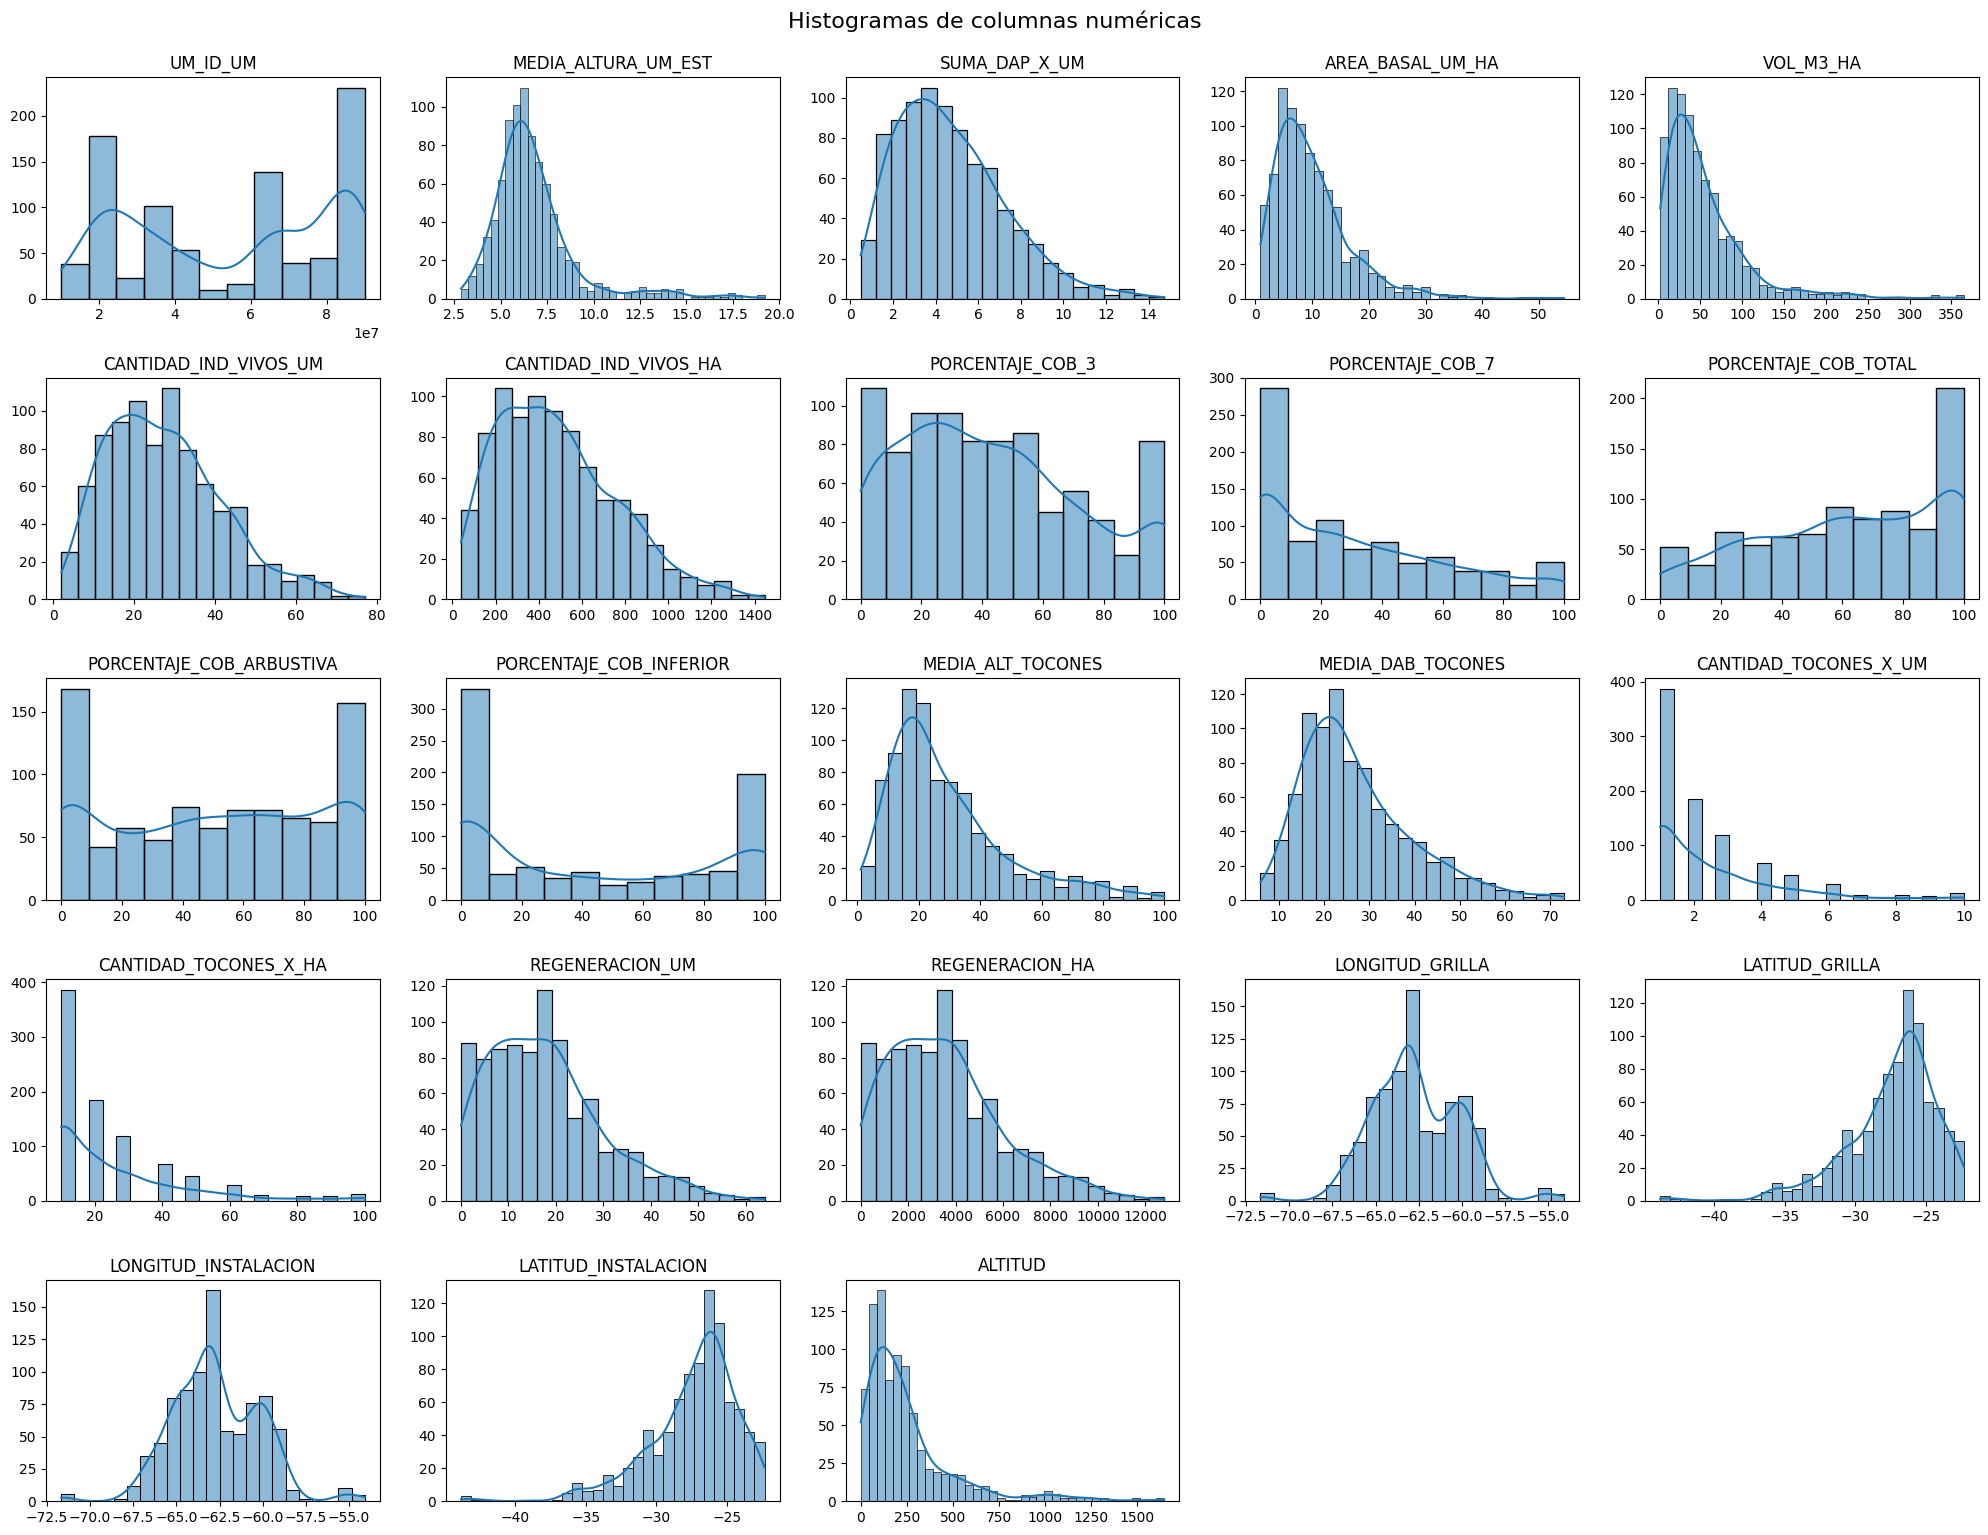

In [29]:
# Número de columnas a graficar
n = len(columnas_num)

# Determinar cantidad de filas y columnas
n_cols = 5
n_rows = math.ceil(n / n_cols)

# Crear figura y ejes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*3))
axes = axes.flatten()  # Para iterar fácilmente

# Graficar cada histograma
for i, col in enumerate(columnas_num):
    sns.histplot(df_general_filtrado[col], kde=True, ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Borrar subplots vacíos si hay
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Histogramas de columnas numéricas", fontsize=16, y=1.02)
plt.show()

In [30]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd

provincias = gpd.read_file("C:/Users/PC/Documents/DiploDatos/mentoria/Mentor-a-M17-Estimaci-n-de-biomasa-en-Inventarios-Forestales-Nacionales/lineas_provinciales/gadm41_ARG_1.shp") # para agregar departamentos:gadm41_ARG_2

fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Límites provinciales argentinos
provincias.boundary.plot(ax=ax, edgecolor='b', linewidth=0.3)


# Límites internacionales y costeros
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='b',linewidth=0.7)
ax.add_feature(cfeature.COASTLINE,edgecolor='b',linewidth=0.7)

# Plot points from df_general
ax.scatter(
    df_general['LONGITUD_INSTALACION'],
    df_general['LATITUD_INSTALACION'],
    color='green', s=10, alpha=0.5, label='Instalaciones'
)

ax.set_extent([-75, -50, -60, -15])
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
# Set xticks for longitude
xticks = np.arange(-80, -49, 5)
ax.set_xticks(xticks, crs=ccrs.PlateCarree())
ax.set_xticklabels([str(x) for x in xticks])

# Set yticks for latitude
yticks = np.arange(-60, -14, 5)
ax.set_yticks(yticks, crs=ccrs.PlateCarree())
ax.set_yticklabels([str(y) for y in yticks])
ax.set_title('Ubicación de Instalaciones')
ax.legend()
plt.show()

DataSourceError: C:/Users/PC/Documents/DiploDatos/mentoria/Mentor-a-M17-Estimaci-n-de-biomasa-en-Inventarios-Forestales-Nacionales/lineas_provinciales/gadm41_ARG_1.shp: No such file or directory

In [31]:
from scipy.stats import gaussian_kde
# Cargar provincias
provincias = gpd.read_file("C:/Users/PC/Documents/DiploDatos/mentoria/lineas_provinciales/gadm41_ARG_1.shp")

# Extraer coordenadas
coords = df_general[['LONGITUD_INSTALACION', 'LATITUD_INSTALACION']].dropna()
x = coords['LONGITUD_INSTALACION'].values
y = coords['LATITUD_INSTALACION'].values

# Calcular KDE
xy = np.vstack([x, y])
kde = gaussian_kde(xy)
xmin, xmax = -75, -50
ymin, ymax = -60, -15
xx, yy = np.mgrid[xmin:xmax:200j, ymin:ymax:200j]
positions = np.vstack([xx.ravel(), yy.ravel()])
density = kde(positions).reshape(xx.shape)

# Plot
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Provincias
provincias.boundary.plot(ax=ax, edgecolor='blue', linewidth=0.5)

# Bordes y costas
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black')
ax.add_feature(cfeature.COASTLINE)

# Mapa de densidad
density_plot = ax.contourf(xx, yy, density, levels=15, cmap='YlOrRd', alpha=0.6, transform=ccrs.PlateCarree())

# Agregar puntos originales (opcional)
# ax.scatter(x, y, color='green', s=5, alpha=0.4, label='Instalaciones')

# Ticks y etiquetas
ax.set_extent([xmin, xmax, ymin, ymax])
xticks = np.arange(xmin, xmax + 1, 5)
yticks = np.arange(ymin, ymax + 1, 5)
ax.set_xticks(xticks, crs=ccrs.PlateCarree())
ax.set_yticks(yticks, crs=ccrs.PlateCarree())
ax.set_xticklabels([str(x) for x in xticks])
ax.set_yticklabels([str(y) for y in yticks])
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.set_title('Densidad de Instalaciones')
ax.legend()

# Barra de color
cbar = plt.colorbar(density_plot, orientation='vertical', pad=0.02, ax=ax, label='Densidad estimada')

plt.tight_layout()
plt.show()

DataSourceError: C:/Users/PC/Documents/DiploDatos/mentoria/lineas_provinciales/gadm41_ARG_1.shp: No such file or directory

### Archivo 2 >> individuos_pais_2021

In [32]:
url2 = 'https://raw.githubusercontent.com/poggiogu/DiploDatos2025_Mentoria_17/master/data_individuos_pais_2021.csv'
df_individuos = pd.read_csv(url2, low_memory=False)

In [33]:
df_individuos.head(3)

,UM_ID_UM,NO_INDIV,PARCELA_CONCENTRICA,ESPECIE_CORREGIDA,REGION_OFC,SUBREG,ESTADO_INDIV,ALTURA_TOTAL_M,PROVINCIA,COORDENADAS_GPS_LATITUDE2,...,CLASE_DIAM,BIOMASA_TN_HA,CARBONO_TN_HA,MEDIA_DIAM_COPA,DAB_FINAL_M,DIAMETRO_COPA_1,DIAMETRO_COPA_2,DAB_CM,Ley_N1_06,Ley_N2_06
0,6074195,1,A,Prosopis alpataco,MON,Monte,2,4.2,6,-39.366333,...,[10-20],0.270712,0.129942,0.0,0.0,NaN,NaN,NaN,OTF,Bosque mixto
1,6074195,3,A,UNLISTED,MON,Monte,3,4.8,6,-39.366333,...,[10-20],0.207121,0.099418,0.0,0.0,NaN,NaN,NaN,OTF,Bosque mixto
2,6074195,8,A,UNLISTED,MON,Monte,4,4.4,6,-39.366333,...,[5-10],0.125851,0.060408,0.0,0.0,NaN,NaN,NaN,OTF,Bosque mixto


In [ ]:
print(f'Shape del dataframe df_individuos: {df_individuos.shape}')
print("")
df_individuos.info()

Shape del dataframe df_individuos: (101229, 31)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101229 entries, 0 to 101228
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   UM_ID_UM                    101229 non-null  int64  
 1   NO_INDIV                    101229 non-null  int64  
 2   PARCELA_CONCENTRICA         101229 non-null  object 
 3   ESPECIE_CORREGIDA           101229 non-null  object 
 4   REGION_OFC                  101229 non-null  object 
 5   SUBREG                      96093 non-null   object 
 6   ESTADO_INDIV                101229 non-null  object 
 7   ALTURA_TOTAL_M              101226 non-null  float64
 8   PROVINCIA                   101229 non-null  int64  
 9   COORDENADAS_GPS_LATITUDE2   101229 non-null  float64
 10  COORDENADAS_GPS_LONGITUDE2  101229 non-null  float64
 11  DAP_FINAL_M                 101229 non-null  float64
 12  ALTURA_TOTAL_EST       